# Graphing Ideas

### 1. Top 5 and Least 5 in all subjects
### 2. Common Top and Least 10
### 3. Top 5 in one subject with other subject
### 4. Least 5 in one subject with other subject
### 5. Count of Frequency of marks in all subjects with DF and Bar chart
### 6. Average marks in all subjects with DF and Bar chart
### 7. Standard Deviations of marks in all subjects with DF and Bar chart
### 8. Single Student Performance in all the subjects part wise Bar Chart
### 9. Students who obtained same equal marks in all the given subjects
### 10. DF of students who obtained more than X marks in one subject w.r.t to another subject
### 11. DF of students who obtained less than X marks in one subject w.r.t to another subject
### 12. DF of students who obtained in range X-Y marks in one subject w.r.t to another subject

In [335]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import difflib
from difflib import SequenceMatcher
import plotly.express as px


In [336]:
sns.set_theme(context='notebook',style='darkgrid',palette='deep',font='sans-serif',rc={'figure.figsize':(12,8)})

In [337]:
dms = pd.read_excel("datasets/DMS.xlsx")
python = pd.read_excel("datasets/Programming Essentials in Python.xlsx")
se = pd.read_excel("datasets/Software Engineering.xlsx")
sds = pd.read_excel("datasets/SDS-2.xlsx")

In [338]:
sub_code = dms.at[1,"VIGNAN'S INSTITUTE OF INFORMATION TECHNOLOGY (AUTONOMOUS) : VISAKHAPATNAM"]
sub_name = dms.at[1,"Unnamed: 3"]

print(sub_name)
print(sub_code)


Course Name : Discrete Mathematical Structures
Course Code : 1000202100


In [339]:
sub_code = python.at[1,"VIGNAN'S INSTITUTE OF INFORMATION TECHNOLOGY (AUTONOMOUS) : VISAKHAPATNAM"]
sub_name = python.at[1,"Unnamed: 3"]

print(sub_name[14:])
print(sub_code[14:])

PROGRAMMING ESSENTIALS IN PYTHON
005202104


In [340]:
sub_code = se.at[1,"VIGNAN'S INSTITUTE OF INFORMATION TECHNOLOGY (AUTONOMOUS) : VISAKHAPATNAM"]
sub_name = se.at[1,"Unnamed: 3"]

print(sub_name)
print(sub_code)

Course Name :SOFTWARE ENGINEERING
Course Code :1005202103


# Data Cleaning

In [341]:
python.drop(labels=[0,1,2,3,4], axis=0,inplace=True)
# dropping unnessary rows
python.drop(["VIGNAN'S INSTITUTE OF INFORMATION TECHNOLOGY (AUTONOMOUS) : VISAKHAPATNAM",'Unnamed: 5','Unnamed: 8','Unnamed: 10','Unnamed: 13'], axis=1,inplace=True)
# renaming cols
python.columns = ['roll','objective','2A','2B','3A','3B','4','Total-30M','Total-18M']
# resetting the index
python.reset_index(inplace = True)
python.index+=1
# dropping previous index
python.drop(['index'], axis=1,inplace=True)
# filling null values with 0
python.dropna(thresh=6, inplace=True)
python.fillna(value=0, inplace=True)



dms.drop(labels=[0,1,2,3,4], axis=0,inplace=True)
dms.drop(["VIGNAN'S INSTITUTE OF INFORMATION TECHNOLOGY (AUTONOMOUS) : VISAKHAPATNAM",'Unnamed: 5','Unnamed: 8','Unnamed: 10','Unnamed: 13'], axis=1,inplace=True)
dms.columns = ['roll','objective','2A','2B','3A','3B','4','Total-30M','Total-18M']
dms.reset_index(inplace = True)
dms.index+=1
dms.drop(['index'], axis=1,inplace=True)
dms.dropna(thresh=6, inplace=True)
dms.fillna(value=0, inplace=True)

se.drop(labels=[0,1,2,3,4], axis=0,inplace=True)
se.drop(["VIGNAN'S INSTITUTE OF INFORMATION TECHNOLOGY (AUTONOMOUS) : VISAKHAPATNAM",'Unnamed: 5','Unnamed: 8','Unnamed: 10','Unnamed: 13'], axis=1,inplace=True)
se.columns = ['roll','objective','2A','2B','3A','3B','4','Total-30M','Total-18M']
se.reset_index(inplace = True)
se.index+=1
se.drop(['index'], axis=1,inplace=True)
se.dropna(thresh=6, inplace=True)
se.fillna(value=0, inplace=True)

# sds.drop(labels=[0,1,2], axis=0,inplace=True)
# sds.drop(["VIGNAN'S INSTITUTE OF INFORMATION TECHNOLOGY (AUTONOMOUS) : VISAKHAPATNAM",'Unnamed: 5','Unnamed: 8','Unnamed: 10','Unnamed: 13'], axis=1,inplace=True)
# sds.reset_index()

In [342]:
python.set_index("roll")
python.head(10)

,roll,objective,2A,2B,3A,3B,4,Total-30M,Total-18M
1,20L31A5401,5,5,4,3,2,3,17,14
2,20L31A5402,6,5,4,5,5,4,23,18
3,20L31A5403,4,4,4,4,3,4,19,14
4,20L31A5404,6,5,4,5,5,3,22,17
5,20L31A5405,5,3,4,0,4,4,15,13
6,20L31A5406,5,4,4,3,2,1,14,12
7,20L31A5407,2,3,0,2,0,1,6,5
8,20L31A5408,3,5,0,5,0,2,12,9
9,20L31A5409,6,5,5,5,5,4,24,18
10,20L31A5411,6,5,3,5,5,4,22,17


In [343]:
dms.head(10)

,roll,objective,2A,2B,3A,3B,4,Total-30M,Total-18M
1,20L31A5401,5,5,5,3,2,2,17,14
2,20L31A5402,6,5,5,3,3,4,20,16
3,20L31A5403,4,5,5,3,3,3,19,14
4,20L31A5404,6,5,5,3,5,3,21,17
5,20L31A5405,2,5,5,2,5,1,18,11
6,20L31A5406,2,5,2,1,1,1,10,7
7,20L31A5407,1,5,2,0,0,0,7,5
8,20L31A5408,0,3,1,0,0,0,4,2
9,20L31A5409,6,5,5,4,5,3,22,17
10,20L31A5411,6,5,5,3,3,2,18,15


In [344]:
se.head(10)

,roll,objective,2A,2B,3A,3B,4,Total-30M,Total-18M
1,20L31A5401,2,4,4,1,1,0,10,7
2,20L31A5402,3,5,4,5,5,4,23,15
3,20L31A5403,3,5,4,5,4,3,21,14
4,20L31A5404,3,4,4,5,5,4,22,14
5,20L31A5405,1,3,0,4,5,0,12,7
6,20L31A5406,3,5,3,3,2,2,15,11
7,20L31A5407,2,5,3,5,5,0,18,11
8,20L31A5408,1,5,2,5,5,2,19,11
9,20L31A5409,2,4,4,1,4,0,13,9
10,20L31A5411,4,5,5,5,4,3,22,15


# Sorted DataFrame

In [345]:
python_sorted =python.sort_values(by=['Total-18M'], ascending=False)
python_sorted.reset_index(inplace = True)
python_sorted.index+=1
python_sorted.drop(columns=['index'],inplace=True)
python_sorted = python_sorted.loc[~(python_sorted==0).all(axis=1)]
python_sorted.head(10)

,roll,objective,2A,2B,3A,3B,4,Total-30M,Total-18M
1,20L31A5434,6,5,4,5,5,4,23,18
2,20L31A5409,6,5,5,5,5,4,24,18
3,20L31A5425,6,5,5,5,5,4,24,18
4,20L31A5450,6,5,5,5,5,3,23,18
5,20L31A5435,6,5,5,5,4,4,23,18
6,20L31A5452,6,5,5,5,5,4,24,18
7,20L31A5413,6,5,5,5,5,4,24,18
8,20L31A5438,6,5,5,5,5,4,24,18
9,20L31A5414,6,5,5,5,5,4,24,18
10,20L31A5402,6,5,4,5,5,4,23,18


In [346]:
se_sorted =se.sort_values(by=['Total-18M'], ascending=False)
se_sorted.reset_index(inplace = True)
se_sorted.index+=1
se_sorted.drop(columns=['index'],inplace=True)
se_sorted = se_sorted.loc[~(se_sorted==0).all(axis=1)]
se_sorted.head(10)

,roll,objective,2A,2B,3A,3B,4,Total-30M,Total-18M
1,20L31A5418,6,5,5,5,5,4,24,18
2,20L31A5461,6,3,4,5,5,4,21,17
3,20L31A5455,5,5,4,5,5,4,23,17
4,20L31A5427,5,5,3,5,5,4,22,16
5,20L31A5431,4,4,5,5,5,4,23,16
6,20L31A5454,6,5,4,5,3,3,20,16
7,20L31A5452,4,5,4,5,5,4,23,16
8,20L31A5416,5,5,4,4,4,4,21,16
9,20L31A5438,4,4,5,5,5,4,23,16
10,20L31A5460,4,4,4,5,4,4,21,15


In [347]:
dms_sorted = dms.sort_values(by=['Total-18M'], ascending=False)
dms_sorted.reset_index(inplace = True)
dms_sorted.index+=1
dms_sorted.drop(columns=['index'],inplace=True)
dms_sorted = dms_sorted.loc[~(dms_sorted==0).all(axis=1)]
dms_sorted.head(10)

,roll,objective,2A,2B,3A,3B,4,Total-30M,Total-18M
1,20L31A5431,6,5,5,5,5,4,24,18
2,20L31A5418,6,5,5,3,5,3,21,17
3,20L31A5404,6,5,5,3,5,3,21,17
4,20L31A5409,6,5,5,4,5,3,22,17
5,20L31A5451,6,5,5,5,5,2,22,17
6,20L31A5452,6,5,5,5,5,2,22,17
7,20L31A5454,6,5,5,3,5,2,20,16
8,20L31A5402,6,5,5,3,3,4,20,16
9,20L31A5444,6,5,5,3,5,2,20,16
10,20L31A5415,6,5,5,5,3,2,20,16


In [348]:
top5_python = python_sorted.head(5)
least5_python = python_sorted.tail(5)

top5_dms = dms_sorted.head(5)
least5_dms = dms_sorted.tail(5)

top5_se = se_sorted.head(5)
least5_se = se_sorted.tail(5)

# Basic all subjects Stats

In [349]:
i=1
for index, std in top5_python.iterrows():
    print("{}.{} has obtained {} marks".format(i,std['roll'],std['Total-18M']))
    i+=1
print("\n")
i=1
for index, std in top5_dms.iterrows():
    print("{}.{} has obtained {} marks".format(i,std['roll'],std['Total-18M']))
    i+=1
print("\n")
i=1
for index, std in top5_se.iterrows():
    print("{}.{} has obtained {} marks".format(i,std['roll'],std['Total-18M']))
    i+=1

1.20L31A5434 has obtained 18 marks
2.20L31A5409 has obtained 18 marks
3.20L31A5425 has obtained 18 marks
4.20L31A5450 has obtained 18 marks
5.20L31A5435 has obtained 18 marks


1.20L31A5431 has obtained 18 marks
2.20L31A5418 has obtained 17 marks
3.20L31A5404 has obtained 17 marks
4.20L31A5409 has obtained 17 marks
5.20L31A5451 has obtained 17 marks


1.20L31A5418 has obtained 18 marks
2.20L31A5461 has obtained 17 marks
3.20L31A5455 has obtained 17 marks
4.20L31A5427 has obtained 16 marks
5.20L31A5431 has obtained 16 marks


In [350]:
i=1;
for index, std in least5_python.iterrows():
    print("{}.{} has obtained {} marks".format(i,std['roll'],std['Total-18M']))
    i+=1
print("\n")
i=1
for index, std in least5_dms.iterrows():
    print("{}.{} has obtained {} marks".format(i,std['roll'],std['Total-18M']))
    i+=1
print("\n")
i=1
for index, std in least5_se.iterrows():
    print("{}.{} has obtained {} marks".format(i,std['roll'],std['Total-18M']))
    i+=1

1.21L35A5402 has obtained 5 marks
2.20L31A5453 has obtained 4 marks
3.20L31A5448 has obtained 3 marks
4.20L31A5441 has obtained 2 marks
5.20L31A5456 has obtained 2 marks


1.20L31A5407 has obtained 5 marks
2.20L31A5417 has obtained 5 marks
3.20L31A5422 has obtained 3 marks
4.20L31A5408 has obtained 2 marks
5.20L31A5456 has obtained 2 marks


1.20L31A5405 has obtained 7 marks
2.20L31A5401 has obtained 7 marks
3.20L31A5433 has obtained 6 marks
4.20L31A5456 has obtained 3 marks
5.20L31A5422 has obtained 3 marks


# Common Top-10 in all subjects

In [351]:
i=1;pythont5 = {};dmst5 = {};set5 = {}
for index,std in python_sorted.head(10).iterrows():
    pythont5.update({std['roll']:std['Total-18M']})
for index,std in dms_sorted.head(10).iterrows():
    dmst5.update({std['roll']:std['Total-18M']})
for index,std in se_sorted.head(10).iterrows():
    set5.update({std['roll']:std['Total-18M']})

In [352]:
python_t5set = set(pythont5)
dms_t5set = set(dmst5)
se_t5set = set(set5)

In [353]:
common_t5set = set.intersection(python_t5set,dms_t5set,se_t5set)
for roll in common_t5set:
    print(roll)
    print('marks in python :',*(python.loc[python['roll']== roll,'Total-18M']))
    print('marks in dms :',*(dms.loc[dms['roll']== roll,'Total-18M']))
    print('marks in se :',*(se.loc[se['roll']== roll,'Total-18M']))

20L31A5452
marks in python : 18
marks in dms : 17
marks in se : 16


# Common Least-10 in all subjects

In [354]:
i=1;pythonl5 = {};dmsl5 = {};sel5 = {}
for index,std in python_sorted.tail(10).iterrows():
    pythonl5.update({std['roll']:std['Total-18M']})
for index,std in dms_sorted.tail(10).iterrows():
    dmsl5.update({std['roll']:std['Total-18M']})
for index,std in se_sorted.tail(10).iterrows():
    sel5.update({std['roll']:std['Total-18M']})

In [355]:
python_l5set = set(pythonl5)
print(python_l5set)
dms_l5set = set(dmsl5)
se_l5set = set(sel5)

{'21L35A5404', '21L35A5401', '20L31A5441', '20L31A5448', '20L31A5456', '20L31A5445', '20L31A5412', '20L31A5407', '21L35A5402', '20L31A5453'}


In [356]:
common_l5set = set.intersection(python_l5set,dms_l5set,se_l5set)
for roll in common_l5set:
    print(roll)
    print('marks in python:',*(python.loc[python['roll']== roll,'Total-18M']))
    print('marks in dms :',*(dms.loc[dms['roll']== roll,'Total-18M']))
    print('marks in se :',*(se.loc[se['roll']== roll,'Total-18M']))

20L31A5456
marks in python: 2
marks in dms : 2
marks in se : 3


# Top 5 in one subject with other subject

In [357]:
# Top 5 students of DMS w.r.t to python

i=1
for index, std in top5_dms.iterrows():
        marks = ((python[python['roll'] == std['roll']]['Total-18M']).values)
        print("{}.{} has obtained {} marks".format(i,std['roll'],*marks))
        i+=1

1.20L31A5431 has obtained 14 marks
2.20L31A5418 has obtained 15 marks
3.20L31A5404 has obtained 17 marks
4.20L31A5409 has obtained 18 marks
5.20L31A5451 has obtained 15 marks


# Least 5 in one subject with other subject

In [358]:
# Least 5 students of DMS w.r.t to python

i=1
for index, std in least5_dms.iterrows():
        marks = ((python[python['roll'] == std['roll']]['Total-18M']).values)
        print("{}.{} has obtained {} marks".format(i,std['roll'],*marks))
        i+=1

1.20L31A5407 has obtained 5 marks
2.20L31A5417 has obtained 9 marks
3.20L31A5422 has obtained 11 marks
4.20L31A5408 has obtained 9 marks
5.20L31A5456 has obtained 2 marks


# Count of Frequency of marks

In [359]:
marks_frequency_df = pd.DataFrame()
marks_frequency_df.head()

""


In [381]:
m_stats_dict_dms = (dms['Total-18M'].value_counts()).to_dict()
m_stats = (dms['Total-18M'].value_counts()).to_frame()
m_stats= m_stats.reset_index()
m_stats.columns = ['Marks','no.of stds']
m_stats.sort_values(by=['Marks'],ascending=False,inplace=True)
m_stats_dms = m_stats.reset_index()
m_stats_dms.drop(columns=['index'],inplace=True)
m_stats_dms.head(10)

m_stats_dict_se = (se['Total-18M'].value_counts()).to_dict()
m_stats = (se['Total-18M'].value_counts()).to_frame()
m_stats= m_stats.reset_index()
m_stats.columns = ['Marks','no.of stds']
m_stats.sort_values(by=['Marks'],ascending=False,inplace=True)
m_stats_se= m_stats.reset_index()
m_stats_se.drop(columns=['index'],inplace=True)

m_stats_dict_python = (python['Total-18M'].value_counts()).to_dict()
m_stats = (python['Total-18M'].value_counts()).to_frame()
m_stats= m_stats.reset_index()
m_stats.columns = ['Marks','no.of stds']
m_stats.sort_values(by=['Marks'],ascending=False,inplace=True)
m_stats_python = m_stats.reset_index()
m_stats_python.drop(columns=['index'],inplace=True)


,Marks,no.of stds
0,18,1
1,17,5
2,16,5
3,15,8
4,14,8
5,13,10
6,12,3
7,11,6
8,10,8
9,9,2


In [361]:
for key in reversed(list(sorted(m_stats_dict_python.keys()))):
    print("no.of students of scored {} are {}".format(key,m_stats_dict_python[key]))

no.of students of scored 18 are 12
no.of students of scored 17 are 9
no.of students of scored 16 are 2
no.of students of scored 15 are 6
no.of students of scored 14 are 11
no.of students of scored 13 are 7
no.of students of scored 12 are 4
no.of students of scored 11 are 4
no.of students of scored 10 are 1
no.of students of scored 9 are 3
no.of students of scored 8 are 1
no.of students of scored 6 are 3
no.of students of scored 5 are 2
no.of students of scored 4 are 1
no.of students of scored 3 are 1
no.of students of scored 2 are 2


In [362]:
for key in reversed(list(sorted(m_stats_dict_se.keys()))):
    print("no.of students of scored {} are {}".format(key,m_stats_dict_se[key]))

no.of students of scored 18 are 1
no.of students of scored 17 are 2
no.of students of scored 16 are 6
no.of students of scored 15 are 4
no.of students of scored 14 are 9
no.of students of scored 13 are 6
no.of students of scored 12 are 5
no.of students of scored 11 are 9
no.of students of scored 10 are 6
no.of students of scored 9 are 9
no.of students of scored 8 are 4
no.of students of scored 7 are 3
no.of students of scored 6 are 1
no.of students of scored 3 are 2


In [363]:
for key in reversed(list(sorted(m_stats_dict_dms.keys()))):
    print("no.of students of scored {} are {}".format(key,m_stats_dict_dms[key]))

no.of students of scored 18 are 1
no.of students of scored 17 are 5
no.of students of scored 16 are 5
no.of students of scored 15 are 8
no.of students of scored 14 are 8
no.of students of scored 13 are 10
no.of students of scored 12 are 3
no.of students of scored 11 are 6
no.of students of scored 10 are 8
no.of students of scored 9 are 2
no.of students of scored 8 are 2
no.of students of scored 7 are 2
no.of students of scored 6 are 2
no.of students of scored 5 are 3
no.of students of scored 3 are 1
no.of students of scored 2 are 2


### Code for mutiple join Situation

filenames = ['fn1', 'fn2', 'fn3', 'fn4',....]
dfs = [pd.read_csv(filename, index_col=index_col) for filename in filenames)]
dfs[0].join(dfs[1:])


https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

In [367]:
# making an Index
m_stats_se_t = m_stats_se.set_index('Marks')
m_stats_python_t = m_stats_python.set_index('Marks')
m_stats_dms_t = m_stats_dms.set_index('Marks')


# renaming col names to resolve ambiguity
m_stats_se_t.rename(columns = {'no.of stds':'se'}, inplace = True)
m_stats_python_t.rename(columns = {'no.of stds':'python'}, inplace = True)
m_stats_dms_t.rename(columns = {'no.of stds':'dms'}, inplace = True)

# setting index col name as none to join the df's
m_stats_se_t.index.name = None
m_stats_dms_t.index.name = None
m_stats_python_t.index.name = None
m_stats_se_t.head()
final_fdf = m_stats_se_t.join(m_stats_python_t)
final_fdf = final_fdf.join(m_stats_dms_t)
final_fdf = final_fdf.fillna(0)

# converting to int if any value is float
for col in list(final_fdf):
    final_fdf[col] = final_fdf[col].astype(int)


final_fdf.head(20)

,se,python,dms
18,1,12,1
17,2,9,5
16,6,2,5
15,4,6,8
14,9,11,8
13,6,7,10
12,5,4,3
11,9,4,6
10,6,1,8
9,9,3,2


In [376]:
test = pd.concat([m_stats_python_t, m_stats_se_t,m_stats_dms_t], axis=1)
test= test.iloc[::-1]
test.fillna(0,inplace=True)
test = test.astype(int)
test.head(20)

,python,se,dms
18,12,1,1
17,9,2,5
16,2,6,5
15,6,4,8
14,11,9,8
13,7,6,10
12,4,5,3
11,4,9,6
10,1,6,8
9,3,9,2


In [380]:
m_stats_python['subject'] = 'python'
m_stats_dms['subject'] = 'dms'
m_stats_se['subject'] = 'se'
    
final_mfreq_df_chart = m_stats_python.append([m_stats_dms,m_stats_se], ignore_index = True)
final_mfreq_df_chart.head(10)

,Marks,no.of stds,subject
0,18,12,python
1,17,9,python
2,16,2,python
3,15,6,python
4,14,11,python
5,13,7,python
6,12,4,python
7,11,4,python
8,10,1,python
9,9,3,python


<AxesSubplot:xlabel='Marks', ylabel='no.of stds'>

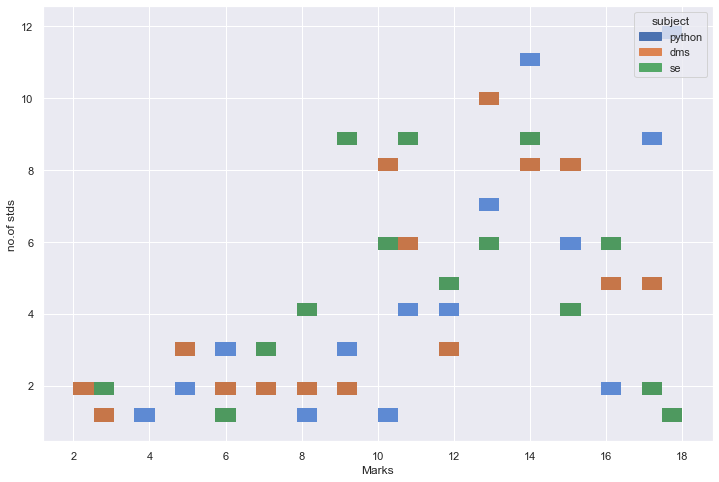

In [307]:
sns.histplot(data=final_mfreq_df_chart,x='Marks', y='no.of stds', bins=30,hue='subject')


In [308]:
fig = px.histogram(final_mfreq_df_chart,orientation='h', y='Marks', x='no.of stds', title="Marks Frequency"
             ,color='subject', barmode='group' ,
             height=700,text_auto=True)
fig.update_layout(
    xaxis_tickfont_size=14,
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
fig.update_traces(textposition='outside')
fig.show()

# Standard Deviations

In [309]:
data = [{'Part':'objective','Std': python['objective'].std()},
        {'Part':'2A','Std': python['2A'].std()},
        {'Part':'2B','Std': python['2B'].std()},
        {'Part':'3A','Std': python['3A'].std()},
        {'Part':'3B','Std': python['3B'].std()},
        {'Part':'4','Std': python['4'].std()},
        {'Part':'Total-30M','Std': python['Total-30M'].std()},
        {'Part':'Total-18M','Std': python['Total-18M'].std()}
       ]
python_std_df = pd.DataFrame(data)
python_std_df_chart = python_std_df

python_std_df = python_std_df.set_index('Part')
python_std_df.index.name = None

data = [{'Part':'objective','Std': dms['objective'].std()},
        {'Part':'2A','Std': dms['2A'].std()},
        {'Part':'2B','Std': dms['2B'].std()},
        {'Part':'3A','Std': dms['3A'].std()},
        {'Part':'3B','Std': dms['3B'].std()},
        {'Part':'4','Std': dms['4'].std()},
        {'Part':'Total-30M','Std': dms['Total-30M'].std()},
        {'Part':'Total-18M','Std': dms['Total-18M'].std()}
       ]
dms_std_df = pd.DataFrame(data)
dms_std_df_chart = dms_std_df

dms_std_df = dms_std_df.set_index('Part')
dms_std_df.index.name = None

data = [{'Part':'objective','Std': se['objective'].std()},
        {'Part':'2A','Std': se['2A'].std()},
        {'Part':'2B','Std': se['2B'].std()},
        {'Part':'3A','Std': se['3A'].std()},
        {'Part':'3B','Std': se['3B'].std()},
        {'Part':'4','Std': se['4'].std()},
        {'Part':'Total-30M','Std': se['Total-30M'].std()},
        {'Part':'Total-18M','Std': se['Total-18M'].std()}
       ]
se_std_df = pd.DataFrame(data)
se_std_df_chart = se_std_df

se_std_df = se_std_df.set_index('Part')
se_std_df.index.name = None


# renaming col names to resolve ambiguity
python_std_df.rename(columns = {'Std':'python'}, inplace = True)
dms_std_df.rename(columns = {'Std':'dms'}, inplace = True)
se_std_df.rename(columns = {'Std':'se'}, inplace = True)



final_std_df = se_std_df.join(python_std_df)
final_std_df = final_std_df.join(dms_std_df)
final_std_df = final_std_df.fillna(0)
final_std_df.head(10)

,se,python,dms
objective,1.468191,1.592957,1.759958
2A,1.012361,1.160959,0.769679
2B,1.574618,1.723168,1.534502
3A,1.543138,1.718462,1.456420
3B,1.396513,1.967554,1.822393
4,1.540792,1.454774,1.110549
Total-30M,4.662174,6.253592,5.005769
Total-18M,3.256972,4.361832,3.848395


In [310]:
python_std_df_chart['subject'] = 'python'
dms_std_df_chart['subject'] = 'dms'
se_std_df_chart['subject'] = 'se'

python_std_df_chart.head(10)
dms_std_df_chart.head(10)
se_std_df_chart.head(10)

,Part,Std,subject
0,objective,1.468191,se
1,2A,1.012361,se
2,2B,1.574618,se
3,3A,1.543138,se
4,3B,1.396513,se
5,4,1.540792,se
6,Total-30M,4.662174,se
7,Total-18M,3.256972,se


In [311]:
final_std_df_chart = python_std_df_chart.append((dms_std_df_chart,se_std_df_chart), ignore_index = True)
final_std_df_chart.head(30)

,Part,Std,subject
0,objective,1.592957,python
1,2A,1.160959,python
2,2B,1.723168,python
3,3A,1.718462,python
4,3B,1.967554,python
5,4,1.454774,python
6,Total-30M,6.253592,python
7,Total-18M,4.361832,python
8,objective,1.759958,dms
9,2A,0.769679,dms


In [312]:
fig = px.histogram(final_std_df_chart, x='Part', y='Std', title="Standard Deviation Part-Wise"
             ,color='subject', barmode='group',
             height=700,text_auto=True)
fig.update_layout(
    xaxis_tickfont_size=14,
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
fig.show()


# Averages

In [313]:
python_avg_df = python.loc[:, python.columns != 'roll']
python_avg_df = python_avg_df.mean().to_frame().reset_index()
python_avg_df = python_avg_df.iloc[1:]
python_avg_df.columns = ['part-wise','avg-marks-obtained']
python_avg_df_chart = python_avg_df


dms_avg_df = dms.loc[:, dms.columns != 'roll']
dms_avg_df = dms_avg_df.mean().to_frame().reset_index()
dms_avg_df = dms_avg_df.iloc[1:]
dms_avg_df.columns = ['part-wise','avg-marks-obtained']
dms_avg_df_chart = dms_avg_df


se_avg_df = se.loc[:, se.columns != 'roll']
se_avg_df = se_avg_df.mean().to_frame().reset_index()
se_avg_df = se_avg_df.iloc[1:]
se_avg_df.columns = ['part-wise','avg-marks-obtained']
se_avg_df_chart = se_avg_df


python_avg_df = python_avg_df.set_index('part-wise')
python_avg_df.index.name = None

dms_avg_df = dms_avg_df.set_index('part-wise')
dms_avg_df.index.name = None

se_avg_df = se_avg_df.set_index('part-wise')
se_avg_df.index.name = None


# renaming col names to resolve ambiguity
python_avg_df.rename(columns = {'avg-marks-obtained':'python'}, inplace = True)
dms_avg_df.rename(columns = {'avg-marks-obtained':'dms'}, inplace = True)
se_avg_df.rename(columns = {'avg-marks-obtained':'se'}, inplace = True)




final_avg_df = se_avg_df.join(python_avg_df)
final_avg_df = final_avg_df.join(dms_avg_df)
final_avg_df = final_avg_df.fillna(0)
final_avg_df = final_avg_df.round(decimals = 3)

final_avg_df.head(10)

,se,python,dms
2A,4.224,4.348,4.779
2B,3.224,3.174,3.941
3A,3.731,3.420,1.706
3B,3.522,2.493,2.191
4,1.746,2.826,1.426
Total-30M,16.448,16.261,14.044
Total-18M,11.597,13.217,11.897


In [314]:
python_avg_df_chart['subject'] = 'python'
dms_avg_df_chart['subject'] = 'dms'
se_avg_df_chart['subject'] = 'se'

python_avg_df_chart.head(10)
dms_avg_df_chart.head(10)
se_avg_df_chart.head(10)

,part-wise,avg-marks-obtained,subject
1,2A,4.223881,se
2,2B,3.223881,se
3,3A,3.731343,se
4,3B,3.522388,se
5,4,1.746269,se
6,Total-30M,16.447761,se
7,Total-18M,11.597015,se


In [315]:
final_avg_df_chart = python_avg_df_chart.append((dms_avg_df_chart,se_avg_df_chart), ignore_index = True)
final_avg_df_chart.head(30)

,part-wise,avg-marks-obtained,subject
0,2A,4.347826,python
1,2B,3.173913,python
2,3A,3.420290,python
3,3B,2.492754,python
4,4,2.826087,python
5,Total-30M,16.260870,python
6,Total-18M,13.217391,python
7,2A,4.779412,dms
8,2B,3.941176,dms
9,3A,1.705882,dms


In [316]:
fig = px.histogram(final_avg_df_chart, x='part-wise', y='avg-marks-obtained', title="Avg Marks of class"
             ,color='subject', barmode='group',
             height=700,text_auto=True)
fig.update_layout(
    xaxis_tickfont_size=14,
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)
fig.show()

# Single Student Performance

In [317]:
rollno = input("Enter roll num: ")
roll_no = difflib.get_close_matches(str(rollno), list(python['roll']))
roll_no = roll_no[0]
std_df = python.loc[python['roll']==roll_no]
std_pivot_python = std_df.transpose().reset_index()
std_pivot_python = std_pivot_python.iloc[1:]
std_pivot_python.columns = ['part-wise','marks-obtained']
std_pivot_python['subject'] = 'python'
std_pivot_python


std_df = dms.loc[dms['roll']==roll_no]
std_pivot_dms = std_df.transpose().reset_index()
std_pivot_dms = std_pivot_dms.iloc[1:]
std_pivot_dms.columns = ['part-wise','marks-obtained']
std_pivot_dms['subject'] = 'dms'
std_pivot_dms


std_df = se.loc[se['roll']==roll_no]
std_pivot_se = std_df.transpose().reset_index()
std_pivot_se = std_pivot_se.iloc[1:]
std_pivot_se.columns = ['part-wise','marks-obtained']
std_pivot_se['subject'] = 'se'
std_pivot_se

Enter roll num: 205413


,part-wise,marks-obtained,subject
1,objective,2,se
2,2A,0,se
3,2B,4,se
4,3A,5,se
5,3B,5,se
6,4,0,se
7,Total-30M,14,se
8,Total-18M,9,se


In [318]:
final_stdu_pivot_chart = std_pivot_python.append((std_pivot_dms,std_pivot_se), ignore_index = True)
final_stdu_pivot_chart.head(30)

,part-wise,marks-obtained,subject
0,objective,6,python
1,2A,5,python
2,2B,5,python
3,3A,5,python
4,3B,5,python
5,4,4,python
6,Total-30M,24,python
7,Total-18M,18,python
8,objective,6,dms
9,2A,5,dms


In [319]:
fig = px.histogram(final_stdu_pivot_chart,y='part-wise', x='marks-obtained',color='subject' ,orientation='h',title=f'{roll_no} Performance',barmode='group',
                  text_auto=True,height=700,width=1000)
fig.update_layout(
    yaxis = dict(autorange="reversed")
)
fig.update_layout(
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    barmode='group',
    bargap=0.35, 
    bargroupgap=0.1
)
fig.show()

# 2 subjects same marks

In [320]:
eqmarks_df = pd.DataFrame()
eqmarks_df['roll'] = dms['roll']
eqmarks_df['dms'] = dms['Total-18M']
eqmarks_df['se'] = python['Total-18M'] 
eqmarks_df['marksmatch'] = np.where(eqmarks_df['dms'] == eqmarks_df['se'], True, False)
eqmarks_df = eqmarks_df.loc[eqmarks_df.marksmatch, :]
eqmarks_df.drop('marksmatch',axis=1,inplace=True)
eqmarks_df.reset_index(inplace=True)
eqmarks_df.drop('index',axis=1,inplace=True)
eqmarks_df.head(20)

,roll,dms,se
0,20L31A5401,14,14
1,20L31A5403,14,14
2,20L31A5404,17,17
3,20L31A5407,5,5
4,20L31A5433,14,14
5,20L31A5437,11,11
6,20L31A5444,16,16
7,20L31A5454,16,16
8,20L31A5456,2,2
9,21L35A5403,13,13


# 2 Subjects one fixed by user

In [325]:
# Gives a DF in which one subject is fixed with constant value 

x = int(input("Enter marks: "))
eqmarks_df = pd.DataFrame()
eqmarks_df['roll'] = dms['roll']
eqmarks_df['dms'] = dms['Total-18M']
eqmarks_df['se'] = python['Total-18M'] 
eqmarks_df['marksmatch'] = np.where(eqmarks_df['dms'] == x, True, False)
eqmarks_df = eqmarks_df.loc[eqmarks_df.marksmatch, :]
eqmarks_df.drop('marksmatch',axis=1,inplace=True)
eqmarks_df.reset_index(inplace=True)
eqmarks_df.drop('index',axis=1,inplace=True)
eqmarks_df.head(20)

Enter marks: 14


,roll,dms,se
0,20L31A5401,14,14
1,20L31A5403,14,14
2,20L31A5427,14,15
3,20L31A5433,14,14
4,20L31A5435,14,18
5,20L31A5460,14,15
6,20L31A5462,14,17
7,20L31A5463,14,12



# 2 Subjects min marks

In [321]:
max_df = pd.DataFrame()
x = int(input("Enter min marks: "))
max_df['roll'] = python.loc[python['Total-18M']>=x,['roll']]
max_df['python marks'] = python.loc[python['Total-18M']>=x,['Total-18M']] 
max_df['dms marks'] = dms['Total-18M']
max_df.reset_index(inplace=True)
max_df.drop('index',axis=1,inplace=True)
print(f'{len(max_df)} members obtained greater than {x} marks')

max_df.head(20)

Enter min marks: 17
21 members obtained greater than 17 marks


,roll,python marks,dms marks
0,20L31A5402,18,16
1,20L31A5404,17,17
2,20L31A5409,18,17
3,20L31A5411,17,15
4,20L31A5413,18,15
5,20L31A5414,18,13
6,20L31A5419,17,13
7,20L31A5423,17,12
8,20L31A5425,18,13
9,20L31A5426,18,11


# 2 Subjects max marks

In [322]:
min_df = pd.DataFrame()
x = int(input("Enter max marks: "))
min_df['roll'] = python.loc[python['Total-18M']<=x,['roll']]
min_df['python marks'] = python.loc[python['Total-18M']<=x,['Total-18M']] 
min_df['dms marks'] = dms['Total-18M']
min_df.reset_index(inplace=True)
min_df.drop('index',axis=1,inplace=True)
print(f'{len(min_df)} members obtained less than {x} marks')

min_df.head(20)

Enter max marks: 12
22 members obtained less than 12 marks


,roll,python marks,dms marks
0,20L31A5406,12,7.0
1,20L31A5407,5,5.0
2,20L31A5408,9,2.0
3,20L31A5412,6,10.0
4,20L31A5416,12,8.0
5,20L31A5417,9,5.0
6,20L31A5421,11,NaN
7,20L31A5422,11,3.0
8,20L31A5437,11,11.0
9,20L31A5441,2,5.0


# 2 Subjects range marks

In [323]:
range_df = pd.DataFrame()
x, y = input("Enter two values: ").split()
range_df['roll'] = python.loc[(python['Total-18M']>=int(x))&(python['Total-18M']<=int(y)),['roll']]
range_df['python marks'] = python.loc[(python['Total-18M']>=int(x))&(python['Total-18M']<=int(y)),['Total-18M']]
range_df['dms marks'] = dms['Total-18M']
range_df.reset_index(inplace=True)
range_df.drop('index',axis=1,inplace=True)
print(f'{len(range_df)} members got marks in between {x} marks and {y} marks ')

range_df.head(20)


Enter two values: 2 6
9 members got marks in between 2 marks and 6 marks 


,roll,python marks,dms marks
0,20L31A5407,5,5
1,20L31A5412,6,10
2,20L31A5441,2,5
3,20L31A5445,6,10
4,20L31A5448,3,9
5,20L31A5453,4,7
6,20L31A5456,2,2
7,21L35A5401,6,9
8,21L35A5402,5,10
